# Baybayin Handwriting Prediction

## Problem Description

The problem of *Baybayin* handwriting prediction involves developing a machine learning model that can accurately recognize and classify handwritten characters in the *Baybayin* script. The script has a unique set of characters with complex shapes and multiple variations, and there is no standardized form or font, making it difficult to create a large, diverse, and well-labeled dataset.

To overcome these challenges, the project aims to develop a robust *Baybayin* handwriting prediction project by addressing research challenges such as data collection and labeling, feature extraction, classification algorithms, and model evaluation.

<img src= 'Alibata Complete Chart.jpeg' length=400></img>

The "Handwritten Baybayin Symbols Dataset" can be found in Mendeley Data (https://data.mendeley.com/datasets/j6cgcfys77)

**The original dataset has `36,000 overall data` but I've decided to narrow it down to the first 1000 samples of each letter in the dataset provided so in this project, I have a total of `17,000 samples`. Take note that the dataset is in `.jpeg` and are in different sizes so I had to do some extra steps to make it into a workable `.csv` file.**

### Extra steps:
* Resized all the samples to 28x28
* Assigned numerical values for each letter
* Ran through a code that distinguish the `target` value and put that in `y dataset`
* Converts X and y into a numpy array
* Converts X and y numpy array into a `2 dimensional` numpy array
* Ran a code that gets all the file names of each sample and makes that into a dataframe called `ID`
* Merged `ID` with X and y

## Importing Packages

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *

from sklearn.decomposition import PCA

import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

%matplotlib inline

## Loading Data

* The **`ID`** represents the filenames of each sample
* We have **`784 columns`** representing the pixels in each image sample (image dimension: 28x28)
* **`17,000 rows`** representing all the samples
* The y dataset's **`target column`** is the `numerical representation of each letter` here's a table to show you that:

| Baybayin  | Romanized | Numerical Value |           
| ----------|-----------|-----------------|
| ᜀ        | a         | 0               |
| ᜊ        | ba        | 1               |
| ᜃ        | ka        | 2               |
| ᜇ        | da-ra     | 3               |
| ᜁ        | e-i       | 4               |
| ᜄ        | ga        | 5               |
| ᜑ        | ha        | 6               |
| ᜎ        | la        | 7               |
| ᜋ        | ma        | 8               |
| ᜈ        | na        | 9               |
| ᜅ        | nga       | 10              |
| ᜂ        | o-u       | 11              |
| ᜉ        | pa        | 12              |
| ᜐ        | sa        | 13              |
| ᜆ        | ta        | 14              |
| ᜏ        | wa        | 15              |
| ᜌ        | ya        | 16              |

In [2]:
X = pd.read_csv('data/X.csv', dtype=int, index_col='ID')

In [3]:
X

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
ID,,,,,,,,,,,,,,,,,,,,,
5109,252,255,250,255,255,250,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
5135,254,255,249,248,255,251,255,252,248,255,...,255,255,255,255,255,255,255,255,255,255
5653,250,255,254,243,251,255,247,255,255,85,...,255,255,255,255,255,255,255,255,255,255
5647,249,255,245,246,255,245,252,254,255,255,...,255,255,255,255,255,255,255,255,255,255
5121,255,252,240,255,136,1,0,202,255,243,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16761,255,255,241,247,255,244,247,255,255,255,...,255,255,255,255,255,255,255,255,255,255
16775,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
16985,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [4]:
y = pd.read_csv('data/y.csv', dtype=int, index_col='ID')

In [5]:
y

,target
ID,
5109,0
5135,0
5653,0
5647,0
5121,0
...,...
16761,16
16775,16
16985,16


In [6]:
test = pd.read_csv('data/test.csv', dtype=int, index_col='ID')

In [7]:
test

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
ID,,,,,,,,,,,,,,,,,,,,,
481,255,252,255,243,255,253,249,252,255,255,...,255,255,255,255,255,255,255,255,255,255
4723,249,249,254,255,247,255,247,254,241,255,...,247,217,48,24,76,250,255,250,255,242
4737,255,235,255,250,244,255,247,255,247,255,...,242,5,95,68,77,83,226,255,245,252
4904,250,255,254,255,248,241,255,251,255,255,...,254,255,247,255,255,229,239,255,253,247
456,252,255,255,249,255,254,252,255,255,251,...,4,0,49,117,248,247,246,234,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16761,255,255,241,247,255,244,247,255,255,255,...,255,255,255,255,255,255,255,255,255,255
16775,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
16985,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


## EDA

#### Visualizing the data

Let's first show 5 samples of each *Baybayin* letter

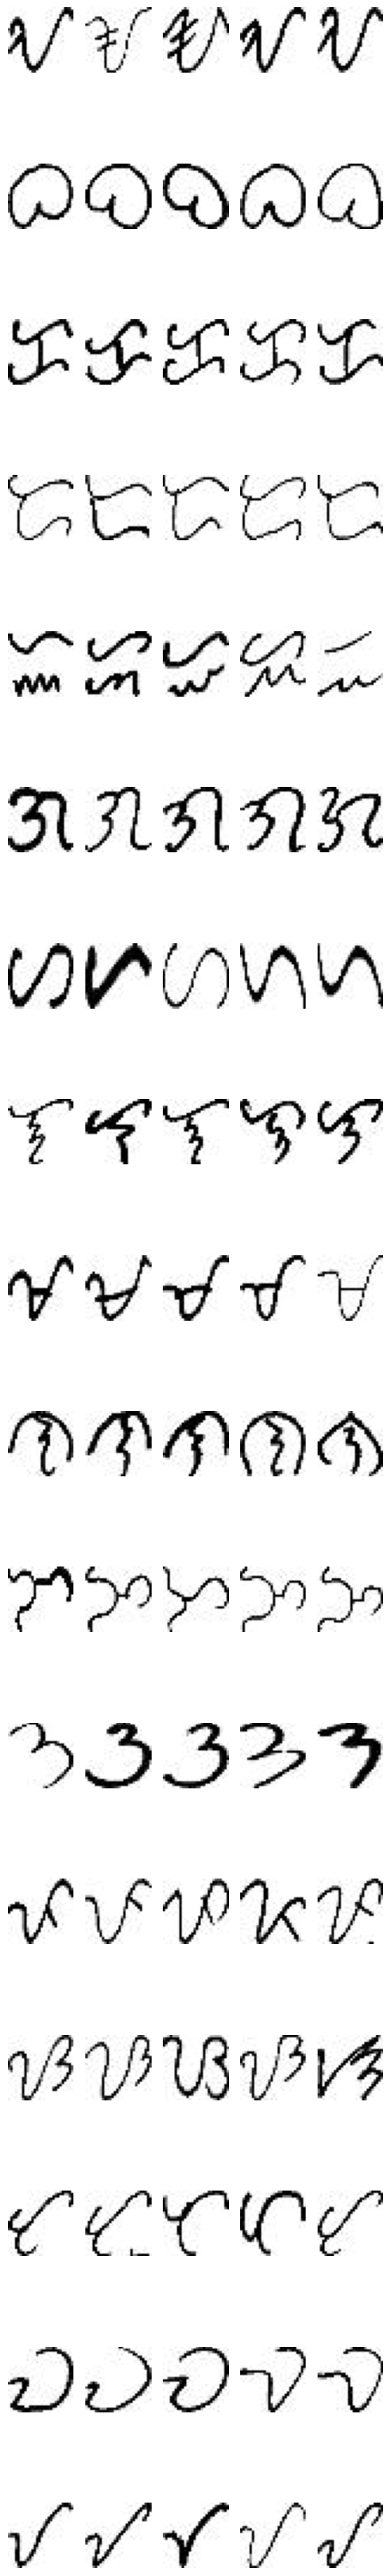

In [8]:
# Combine X and y into a single dataframe
df = pd.concat([X, y], axis=1)

# Get unique letters
unique_letters = df['target'].unique()

# Plot the first 5 samples for each letter
fig, axs = plt.subplots(nrows=len(unique_letters), ncols=5, figsize=(5, 2*len(unique_letters)))
for i, letter in enumerate(unique_letters):
    letter_samples = df[df['target']==letter].head(5)
    images = letter_samples.drop('target', axis=1).values.reshape(-1, 28, 28)
    for j in range(len(images)):
        axs[i, j].imshow(images[j], cmap='gray')
        axs[i, j].axis('off')
    axs[i, 0].set_ylabel('Letter {}'.format(letter), fontsize=16, rotation=0, labelpad=50)
plt.tight_layout()
plt.show()

#### Plots and Graphs

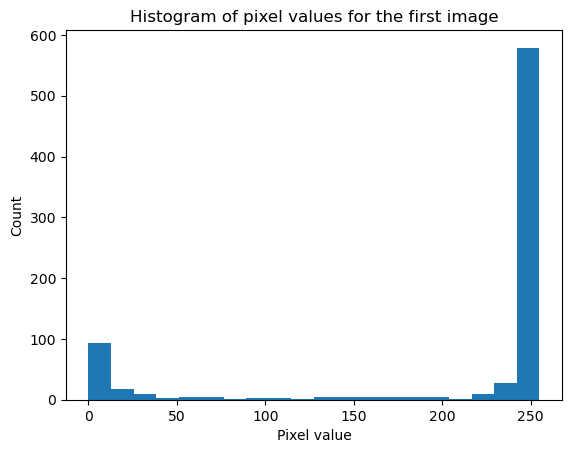

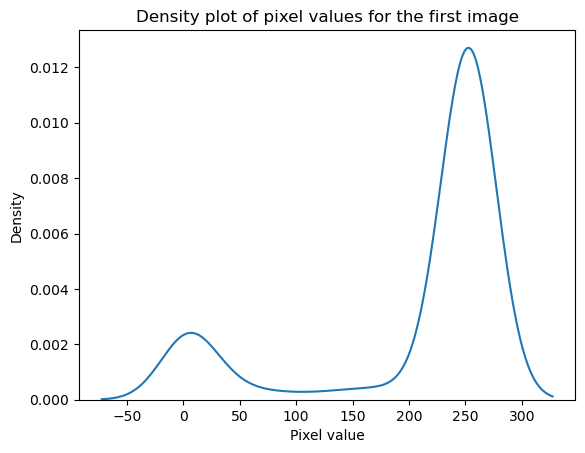

In [9]:
# Get the first image
image = X.iloc[0]

# Create a histogram of pixel values
plt.hist(image, bins=20)
plt.xlabel('Pixel value')
plt.ylabel('Count')
plt.title('Histogram of pixel values for the first image')
plt.show()

# Create a density plot of pixel values
sns.kdeplot(image)
plt.xlabel('Pixel value')
plt.ylabel('Density')
plt.title('Density plot of pixel values for the first image')
plt.show()

The first plot shows a histogram of pixel values for the first image in the dataset. We can see that the pixel values are mostly concentrated around 0, with some outliers towards higher values. That means most of the pixels in the image have a low level of brightness, and there are only a few pixels with high brightness. This suggests that the image is mostly dark.

In the density plot, we can see that the distribution of pixel brightness is skewed to the right, meaning that there are more pixels with low brightness than high brightness.

#### PCA
PCA is used to reduce the number of features in a dataset while preserving as much of the original variation as possible. This can be helpful when visualizing high-dimensional data because it allows us to plot the data in a lower-dimensional space (e.g., 2D or 3D) that we can more easily visualize.

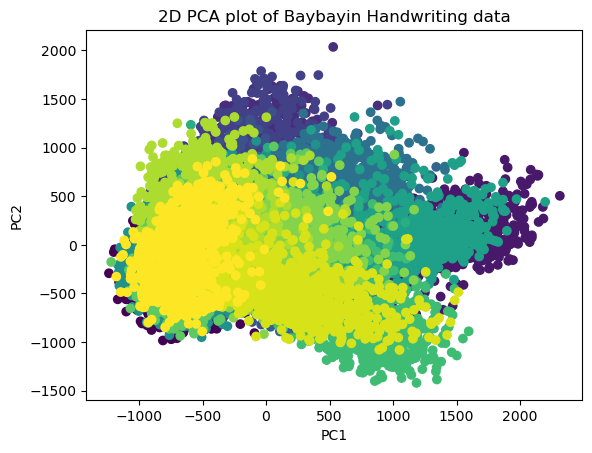

In [10]:
# Extract target variable as a sequence of numbers
ravel = y.values.ravel()

# Fit PCA to X
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the data in 2D using the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=ravel, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA plot of Baybayin Handwriting data')
plt.show()

You can see that the data points are separated somewhat by letter, but there is still significant overlap between some of the letters.

### Let's check if the classes are balanced 

In [11]:
y['target'].value_counts()

0     1000
9     1000
15    1000
14    1000
13    1000
12    1000
11    1000
10    1000
8     1000
1     1000
7     1000
6     1000
5     1000
4     1000
3     1000
2     1000
16    1000
Name: target, dtype: int64

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

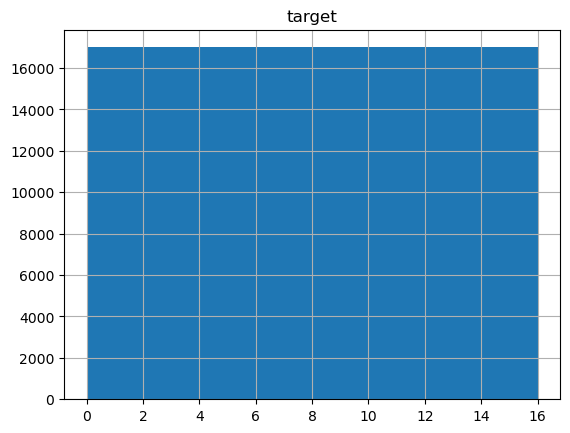

In [12]:
y.hist(bins=1)

## Training Model

In [13]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,
                                                                    y,
                                                                    test_size=0.2,
                                                                    random_state=4321)

## Random Forest Classifier

In [14]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
rf_f1 = f1_score(y_test, rf_pred, average='micro')
print("F1-score:", rf_f1)

/var/folders/gf/g5vywvbn7zgbm67d08rl0w980000gn/T/ipykernel_27054/1948124902.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


F1-score: 0.923235294117647


## XGBoost

In [15]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_f1 = f1_score(y_test, xgb_pred, average='micro')
print('F1-score:', xgb_f1)

F1-score: 0.9376470588235294


## SGD Classifier

In [16]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)
sgd_f1 = f1_score(y_test, sgd_pred, average='micro')
print('F1-score:', sgd_f1)

/Users/eej/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1-score: 0.8547058823529412


## Naive Bayes

In [17]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)
nb_pred = nb_clf.predict(X_test)
nb_f1 = f1_score(y_test, nb_pred, average='micro')
print('F1-score:', nb_f1)

/Users/eej/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1-score: 0.7655882352941177


## Support Vector Machine

In [18]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)
svm_f1 = f1_score(y_test, svm_pred, average='micro')
print("F1-score:", svm_f1)

/Users/eej/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1-score: 0.9714705882352941


/Users/eej/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


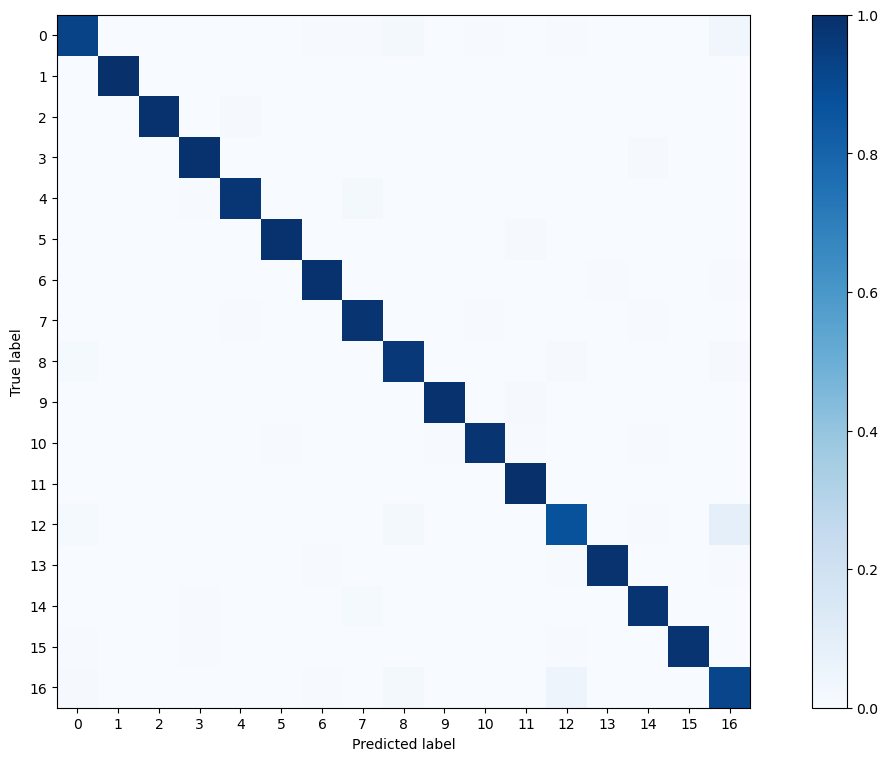

In [19]:
fig, ax = plt.subplots(figsize=(16,9))
metrics.plot_confusion_matrix(svm_clf, X_test, y_test, 
                              cmap=plt.cm.Blues, 
                              normalize='true', 
                              include_values=False,
                             ax=ax)

In [20]:
print(metrics.classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       202
           1       1.00      1.00      1.00       183
           2       1.00      0.99      0.99       190
           3       0.98      0.99      0.99       195
           4       0.99      0.98      0.98       210
           5       1.00      0.99      0.99       205
           6       0.98      0.99      0.99       192
           7       0.96      0.98      0.97       186
           8       0.95      0.97      0.96       219
           9       1.00      0.99      0.99       210
          10       0.99      0.98      0.99       205
          11       0.97      1.00      0.99       195
          12       0.92      0.87      0.89       200
          13       0.99      0.98      0.99       198
          14       0.98      0.98      0.98       223
          15       1.00      0.98      0.99       183
          16       0.87      0.92      0.89       204

    accuracy              

* This is a `classification report` showing the precision, recall, and F1-score for each class (0-16), as well as the macro and weighted averages across all classes. 
* **`Precision`** is the proportion of true positives among the predicted positives 
* **`Recall`** is the proportion of true positives among the actual positives
* **`F1-score`** is the harmonic mean of precision and recall.

* The model appears to perform well with high precision, recall, and F1-scores for most classes, except for class 12 which has a lower precision and recall.
* The macro and weighted averages across all classes are also high, `indicating that the model performs well overall`. 
* The accuracy of the model is 0.97, which means that it correctly predicts the class label for 97% of the instances in the test dataset.

## Conclusion:

Based on the analysis conducted, we can conclude that SVM is the best model for classifying the given dataset. The SVM model achieved an overall accuracy of 97.147%, which is higher than the accuracy achieved by other models such as Random Forest, XGBoost, SGD Classifier, and Naive Bayes.

Additionally, we can observe from the confusion matrix that the model is performing well in predicting both the positive and negative classes. The precision, recall, and F1-score are all high for most of the classes, indicating that the model is balanced in its predictions.

Overall, we can say that the SVM model is a good fit for the given dataset and can be used for accurate classification of the data. However, further analysis can be conducted to improve the performance of the model, such as hyperparameter tuning, feature engineering, and data preprocessing.